In [18]:
from IPython.display import display, HTML

display(HTML("""
<style>
.callout { padding:12px 14px; border-radius:10px; margin:10px 0; }
.callout.note { background:#eff6ff; border-left:6px solid #3b82f6; }
.callout.warn { background:#fff7ed; border-left:6px solid #f97316; }
.callout.good { background:#ecfdf5; border-left:6px solid #10b981; }
.callout.bad  { background:#fef2f2; border-left:6px solid #ef4444; }
</style>
"""))


display(HTML("""
<style>
/* Base callout */
.callout {
  padding: 12px 14px;
  border-radius: 10px;
  margin: 12px 0;
  line-height: 1.35;
  border-left: 6px solid;
  box-shadow: 0 1px 2px rgba(0,0,0,0.06);
}

/* NOTE variant */
.callout.note {
  background: #eff6ff;         /* light blue */
  border-left-color: #3b82f6;   /* blue */
}

/* Optional: title line inside */
.callout .title {
  font-weight: 700;
  margin-bottom: 6px;
}
</style>
"""))

# Homework 02

The goal for this homework will be to become more skilled at building visual summaries of data. 
This is an important part of exploratory data analysis, as a graph can both summarize and give details that may be too long to describe textually. 

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

<div class="callout note">

<h2> Problem one </h2>

The column titled "target" identifies patients who were diagnosed with (value 1) or without (value 0) heart disease.  
Lets use visuals to explore patient attributes that may help identify patients with (or without) heart disease. 

**Task** 
Build visuals to explore differences among patients with or without heart disease for the following variables in the ```heart disease``` dataframe: (1) age, (2) sex, (3) trestbps, (4) chol, (5) restecg. 
You are free to select the visual that you think best describes this relationship. 

</div>

In [19]:
import pandas as pd 


heart_disease = pd.read_csv("heart.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<div class="callout note">

<h2> Problem two </h2>

H5 bird flu is widespread in wild birds worldwide and is causing outbreaks in poultry and U.S. dairy cows with several recent human cases in U.S. dairy and poultry workers.

While the current public health risk is low, CDC is watching the situation carefully and working with states to monitor people with animal exposures.

CDC is using its flu surveillance systems to monitor for H5 bird flu activity in people.

More information can be found here = [H5](https://www.cdc.gov/bird-flu/h5-monitoring/index.html)

The below code imports from the internet the number of monthly cases of H5 in humans for each country in the world from 1997 to present.
We will use this dataset to explore the number of cases in the United States. 

</div>

In [20]:
import pandas as pd
import requests

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/h5n1-flu-reported-cases.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/h5n1-flu-reported-cases.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

print(df.head())

   Entity Code         Day  avian_cases_month
0  Africa  NaN  1997-01-01                  0
1  Africa  NaN  1997-02-01                  0
2  Africa  NaN  1997-03-01                  0
3  Africa  NaN  1997-04-01                  0
4  Africa  NaN  1997-05-01                  0


<div class="callout note">

<h2> Problem two asks </h2>

(a) Subset the dataframe ```df``` to H5 cases in the United states on or after "2022-01-01".
You'll need to use ```loc```. 
Call this subsetted dataframe ```us```.

(b) Draw a barplot using seaborn such that the horizontal axis describes **months** (not days as is already available in the dataset) and the vertical axis describes the number of H5 cases per month. *Make sure to label the horizontal and vertical axes.*

(c)The xtick labels are cluttered, making it hard to tell which months we are presenting to the reader. Seaborn doesn't make it clear, right away, how it plotted this data.
Luckily, seaborn uses as its foundation matplotlib. 
Many of the attributes of an axis can be extracted by appending a **get**, an underscore, and then the attribute.   

For example, if we want to see which xticks were created for the above plot we can write `xticks = ax.get_xticks()` and if we want to see which xtick labels were created for the above plot then we can write `xticklabels = ax.get_xticklabels()`. 

Please modify the above plot such that such that the first xtick is drawn, then the third, fifth, and so on. Use the keyword ```rotation``` to set the xticklabels such that the are rotated 45 degrees. 

</div>

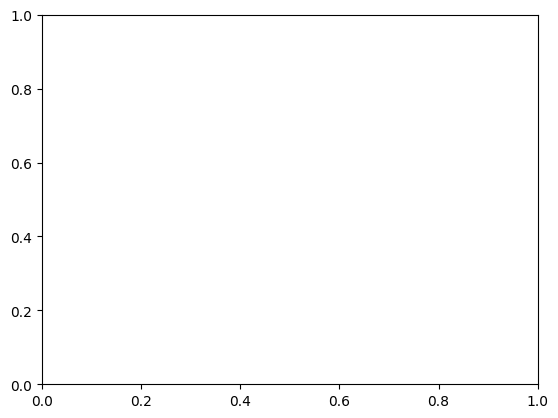

In [21]:
# Example of using get
import matplotlib.pyplot as plt 

fig, ax     = plt.subplots()
xticks      = ax.get_xticks()
xticklabels = ax.get_xticklabels()

<div class="callout note">

<h2> Problem three </h2>

(a) Intuitively, the "most correlated" two variables $X$ and $Y$ could be is if their values are equal.
That is, if $\mathcal{D} = ( (x_{1},x_{1}),(x_{2},x_{2}), \cdots, (x_{n},x_{n}) )$. 
Under this condition, what is the value of the correlation?.

(b) It is also possible that the two variables $X$ $Y$ can be perfectly correlated but opposite of one another. 
In otherwords, whenever we observe the value $x$ we observe the value $-x$.
Under this condition, what is the value of the correlation?.

(c) Based on (a) and (b) what are the lower and upper bounds of the correlation? 

</div>

<div class="callout note">

<h2> Problem four </h2>

Below is extracted the variable `age` and the variable `cholesterol` from the heart disease dataset that we worked with in class. 

(a) Use the ```assign``` function in pandas to create two new columns:
1. `z_age` which will be each patient age minus the mean age and divided by the standard deviation for age.
2. `z_chol` which will be each patient cholesterol level minus the mean cholesterol level and divided by the standard deviation for cholesterol level.
   
(b) Compute the covariance and compute the correlation between `z_age` and `z_chol`. 
Please show mathemtically why these values are equal? Hint: Start from the definition for covariance between age and cholesterol and then substitute z_age for age and z_cholesterol for cholesterol. 

</div>

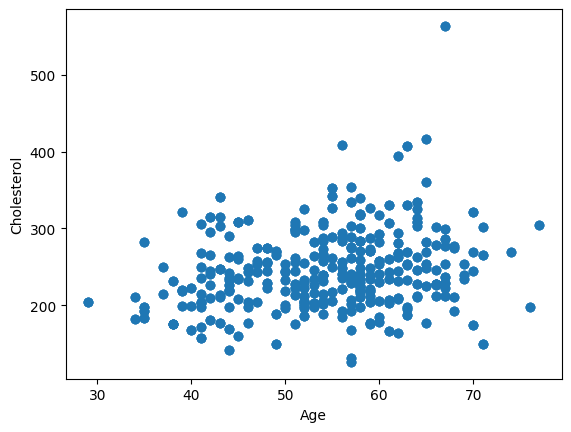

In [22]:
fig,ax = plt.subplots()
ax.scatter(heart_disease["age"], heart_disease["chol"])

ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")

plt.show()

In [23]:
import pandas as pd 
d = pd.read_csv("https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Google%20Mobility%20Trends%20(2020)/Google%20Mobility%20Trends%20(2020).csv")

<div class="callout note">

<h2> Problem five </h2>

This exercise will use the COVID 19 mobility reports that were collected during the pandemic up until about 2022.
From the website(https://www.google.com/covid19/mobility/index.html?hl=en), they write 

"As global communities responded to COVID-19, we heard from public health officials that the same type of aggregated, anonymized insights we use in products such as Google Maps would be helpful as they made critical decisions to combat COVID-19.

These Community Mobility Reports aimed to provide insights into what changed in response to policies aimed at combating COVID-19. The reports charted movement trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential."

(a) Please build a 2 X 2 graph (two plots on the top and two on the bottom). In each axis we will plot the change from baseline activity for the USA, United Kingdom, and South Korea for the following behaviors: Retail and Recreation, Parks, Workplaces, Residential. Make sure to label youe x and y axes, and provide a legend so that the reader can differentiate the three lines. 

(b) For each set of behaviors over time for the three countires, please compute the correlation between US and UK; US and Sourht Korea; and UK and South Korea. Us the function `np.corrcoef` to compute these correlations and report the results. 

(c) For this final, we will plot these behaviors using seaborn. They use an important paradigm in plotting.
Please create a dataset for the US only that contains the columns: Year, Activity, and value. In the activity column will be the phrases: "Retail & Recreation",	"Grocery & Pharmacy", "Parks", "Transit Stations", "Workplaces", "Residential". The value column will contain the corresponding change from baseline for that year and activity. 
Using this dataset, plot one line per Activity on the same plot using seaborn lineplot. 
Label axes etc. 


</div>

<div class="callout note">

<h2> Problem six </h2>

The following code block creates `x_data` and `y_data` in separate numpy arrays. 

(a) Please write code to store these arrays in a Pandas dataframe with the column names "x" and "y". Call that Pandas dataframe `d`. 

(b) Please compute the covariance and the correlation using Pandas functions (Google these!).

(c) You've put in your time and risen through the ranks of data-science-hood. You have a team of your own and that means you need to spend time evaluating their code. The code in the second block computes the covariane and is written by one of your employees. Even though the code produce the correct result, it is wrong and will not work for other datasets. Please describe the coding error; present a fix to this code; and describe why the code produced the correct result. 

</div>

In [24]:
#--First block
x_data = 2*np.random.normal(0,1, size=1000) + 1 #<-- 1000 data points
y_data = -1 + 2*x_data

In [25]:
#--Second block
def compute_covariance( x,y ):
    return np.mean( (x-np.mean(y)) * (y-np.mean(x))  )
compute_covariance(y_data, x_data)

np.float64(7.768339411888792)